In [ ]:
# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

# set local path  iris dataset 
dataset = '/home/paulo/Learning/in/Iris.csv'

#and store in dataframe df
df = pd.read_csv(dataset , na_values=['NA'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
#Analyzing Individual Feature Patterns using Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
# list the data types for each column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


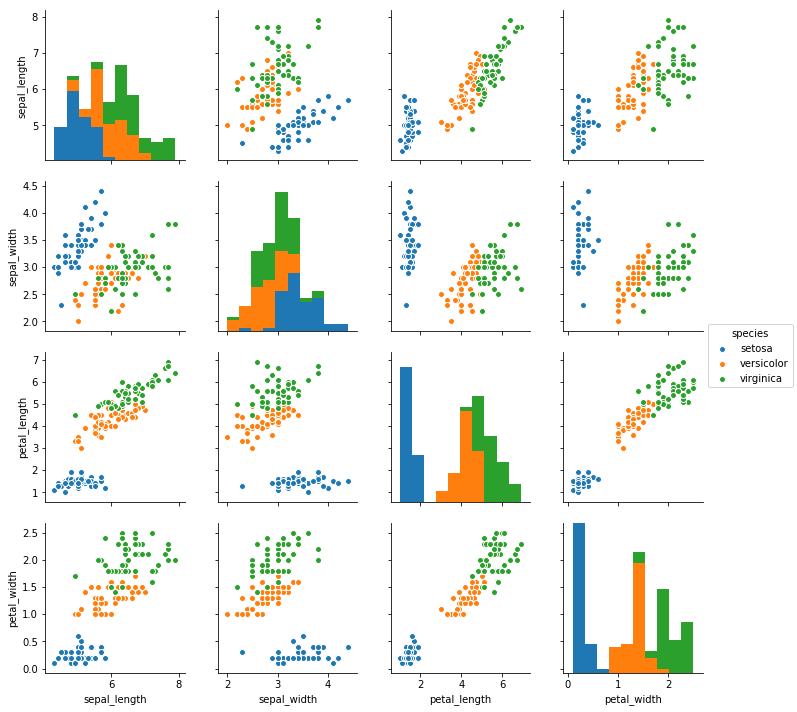

In [16]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sns.pairplot(df.dropna() ,  hue='species')


ValueError: num must be 1 <= num <= 4, not 5

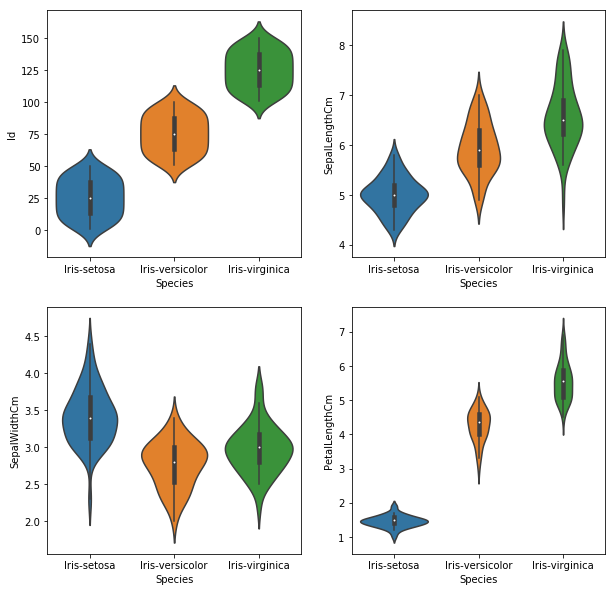

In [15]:
# Violin plots of the data to compare the measurement distributions

plt.figure(figsize=(10, 10))

for column_index, column in enumerate(df.columns):
    if column == 'Species':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='Species', y=column, data=df)



In [11]:
# Correlation
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [13]:
df[['SepalLengthCm', 'SepalWidthCm']].corr()

,SepalLengthCm,SepalWidthCm
SepalLengthCm,1.000000,-0.109369
SepalWidthCm,-0.109369,1.000000


(0, 4.525098427152319)

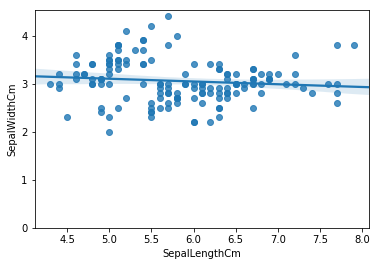

In [16]:
# Engine size as potential predictor variable of .....
sns.regplot(x="SepalLengthCm", y="SepalWidthCm", data=df)
plt.ylim(0,)

In [20]:
# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = df[['SepalLengthCm', 'SepalWidthCm',
                             'PetalLengthCm', 'PetalWidthCm']].values

# Similarly, we can extract the class labels
all_labels = df['Species'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
# Split test data 
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [33]:

from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)



TypeError: '<' not supported between instances of 'float' and 'str'